In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_excel('AcousticFeatures_April16_May14_soo.xlsx')
X = df.loc[:, 'shEnt':'PXX_diff_SMA']
y = df['AHI']

Top Pearson correlations:
 mean            0.255090
kurt            0.255035
logEnt          0.253472
bandPow10_20    0.251573
bandPow0_10     0.249940
range           0.249830
chroma6         0.227625
PXX_mean        0.217596
var             0.217167
PXX_RMS         0.210364
dtype: float64

Top Spearman correlations:
 ddmfcc_6          0.229766
ddmfcc_11         0.176977
ddmfcc_4          0.165281
chroma2           0.164212
chroma10          0.163322
chroma9           0.163000
mfcc_1            0.154137
logEnt            0.153123
chroma3           0.139019
spec_contrast0    0.138913
dtype: float64


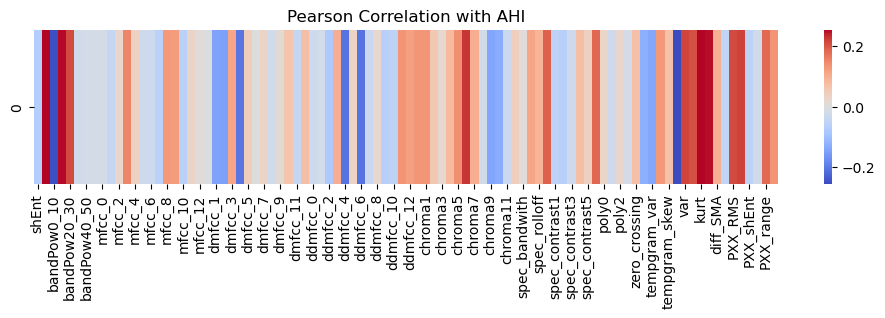

In [5]:
pearson_corr = X.corrwith(y)
spearman_corr = X.corrwith(y, method='spearman')

print("Top Pearson correlations:\n", pearson_corr.abs().sort_values(ascending=False).head(10))
print("\nTop Spearman correlations:\n", spearman_corr.abs().sort_values(ascending=False).head(10))

plt.figure(figsize=(12, 2))
sns.heatmap(pearson_corr.to_frame().T, cmap='coolwarm', center=0)
plt.title("Pearson Correlation with AHI")
plt.show()


Top Mutual Information scores:
 chroma7           0.166828
dmfcc_5           0.166429
dmfcc_12          0.143411
tempgram_skew     0.109772
mfcc_4            0.104716
poly1             0.103959
logEnt            0.099755
dmfcc_4           0.095118
spec_contrast5    0.094512
poly2             0.092400
dtype: float64


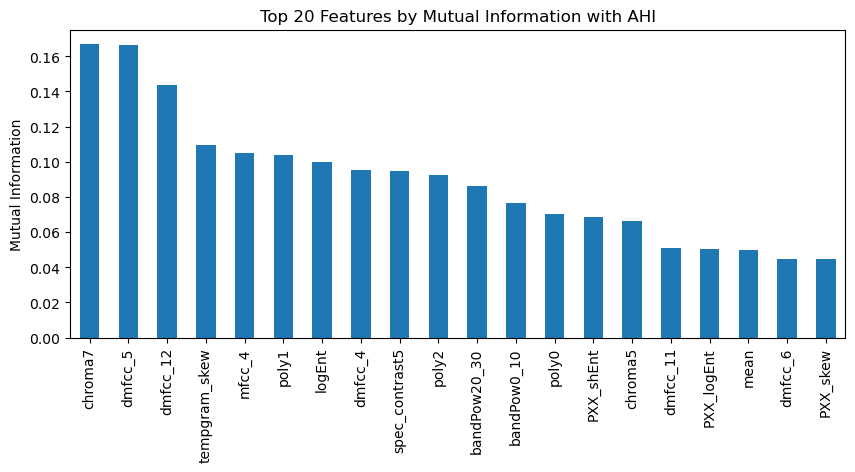

In [6]:
# Mutual information (non-linear relationships)
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

print("\nTop Mutual Information scores:\n", mi_series.head(10))

plt.figure(figsize=(10, 4))
mi_series.head(20).plot(kind='bar')
plt.ylabel("Mutual Information")
plt.title("Top 20 Features by Mutual Information with AHI")
plt.show()


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold

tree = DecisionTreeRegressor(max_depth=None, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree, X, y, cv=kf, scoring='r2')

print("Decision Tree R² per fold:", scores)
print("Mean Decision Tree R²:", scores.mean())


Decision Tree R² per fold: [-2.04050875 -1.34234293 -0.87254906 -0.83172954 -2.16956199]
Mean Decision Tree R²: -1.451338455408195
